**Boring training stuff under here that actually does stuff, no need to touch**

In [1]:
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
import numpy as np
from google.colab import drive
import csv
import matplotlib.dates as dt
import matplotlib.pyplot as plt
import glob
from tensorflow import keras

drive.mount ('/drive/')

Mounted at /drive/


['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', ' High', 'Low', 'Close']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


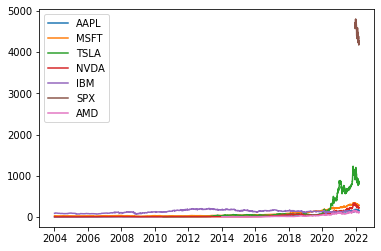

In [2]:
data =  {}
for sto in os.scandir ('/drive/MyDrive/stock/stock_historical_data'):
  s=sto.name[:-4]
  c=[]
  o=[]
  d=[]
  
  close_index = 0
  date_index = 0
  open_index = 0
  with open ("/drive/MyDrive/stock/stock_historical_data/"+s+".csv",'r') as file:
    csv_reader = csv.reader (file)
    for linect,i in enumerate(csv_reader):
      if (linect == 0):
        print (i)
        close_index = i.index ('Close') or i.index (" Close")
        open_index = i.index ('Open') 
        date_index =i.index('Date')
      else:
        o.append (float (i[open_index]))
        c.append (float(i[close_index]))
        d.append (dt.datestr2num(i[date_index]))
  plt.plot_date(d,c,ls='-',marker="",label = s)
  data[s]  = {'open':np.asarray(o),'close':np.asarray(c), 'date':np.asarray(d)}
plt.legend()
plt.show()
plt.clf()
plt.cla()
plt.close()

In [3]:
scaler = MinMaxScaler(feature_range= (0,1))
stocks_to_process = [os.path.basename(os.path.normpath(f))[:-4] for f in glob.glob (pathname='/drive/MyDrive/stock/stock_historical_data/*.csv')]
print (stocks_to_process)
def minmax (stock):
  for i in stock:
   
    data[i]['close']=scaler.fit_transform ( np.array(data[i]['close']).reshape(-1,1))
    data[i]['open']=scaler.fit_transform (np.array(data[i]['open']).reshape (-1,1))
   # data[i]['close']= np.array(data[i]['close']).reshape(-1,1)
   # data[i]['open']=np.array(data[i]['open']).reshape (-1,1)

minmax(stocks_to_process)


['AAPL', 'MSFT', 'TSLA', 'NVDA', 'IBM', 'SPX', 'AMD']


Training with 2064 samples and testing with 0 samples for AMD
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 100, 32)           4480      
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_30 (Dense)            (None, 150)               4950      
                                                                 
 dropout_15 (Dropout)        (None, 150)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               15100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                          

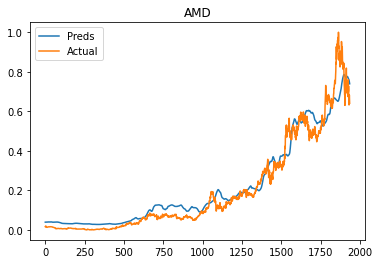

INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/AMD/assets


INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/AMD/assets


Training with 2948 samples and testing with 0 samples for TSLA
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 32)           4480      
                                                                 
 lstm_13 (LSTM)              (None, 32)                8320      
                                                                 
 dense_36 (Dense)            (None, 150)               4950      
                                                                 
 dropout_18 (Dropout)        (None, 150)               0         
                                                                 
 dense_37 (Dense)            (None, 100)               15100     
                                                                 
 dense_38 (Dense)            (None, 100)               10100     
                                                         

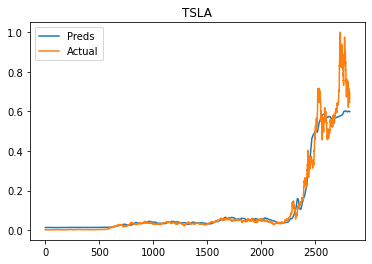

INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/TSLA/assets


INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/TSLA/assets


Training with 4581 samples and testing with 0 samples for AAPL
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100, 32)           4480      
                                                                 
 lstm_15 (LSTM)              (None, 32)                8320      
                                                                 
 dense_42 (Dense)            (None, 150)               4950      
                                                                 
 dropout_21 (Dropout)        (None, 150)               0         
                                                                 
 dense_43 (Dense)            (None, 100)               15100     
                                                                 
 dense_44 (Dense)            (None, 100)               10100     
                                                         

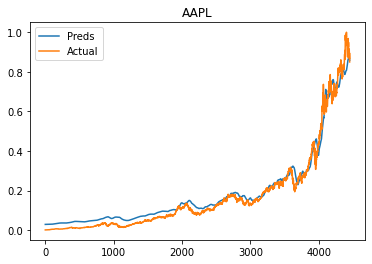

INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/AAPL/assets


INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/AAPL/assets


Training with 4581 samples and testing with 0 samples for MSFT
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 32)           4480      
                                                                 
 lstm_17 (LSTM)              (None, 32)                8320      
                                                                 
 dense_48 (Dense)            (None, 150)               4950      
                                                                 
 dropout_24 (Dropout)        (None, 150)               0         
                                                                 
 dense_49 (Dense)            (None, 100)               15100     
                                                                 
 dense_50 (Dense)            (None, 100)               10100     
                                                         

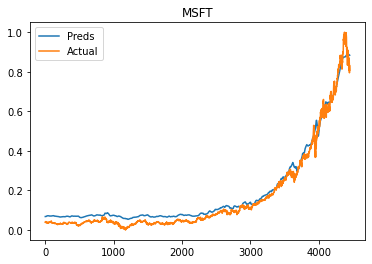

INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/MSFT/assets


INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/MSFT/assets


Training with 4581 samples and testing with 0 samples for IBM
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 100, 32)           4480      
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_54 (Dense)            (None, 150)               4950      
                                                                 
 dropout_27 (Dropout)        (None, 150)               0         
                                                                 
 dense_55 (Dense)            (None, 100)               15100     
                                                                 
 dense_56 (Dense)            (None, 100)               10100     
                                                          

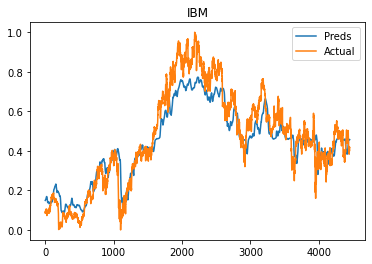

INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/IBM/assets


INFO:tensorflow:Assets written to: /drive/MyDrive/stock/model_weights/IBM/assets


In [7]:
#training, yayyyyyyyyyyyyyyyyyyy (pain)
#what did i even write uhhhhhhhhhhhh

def train_test (stock_name):

    one =int(len(data[stock_name]['date']))
    two =int(len(data[stock_name]['date']))-one
    
    training = np.concatenate((data[stock_name]['open'][:one],data[stock_name]['close'][:one]),axis =1)
    testing = np.concatenate (( data[stock_name]['open'][one:], data[stock_name]['close'][one:]),axis = 1)
    print (f'Training with {one} samples and testing with {two} samples for {stock_name}')
    return training,testing


def create_dataset(dataset, time_step=1,days=30):
  
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-days-1):
    a = dataset[i:(i+time_step)]
    dataX.append(a)
    dataY.append(dataset[i + time_step+days,1])
   
  return np.array(dataX), np.array(dataY)

def setup (stock,time_step  = 100):
   
      training, testing = train_test(stock)
      labels_train,data_train = create_dataset(training, time_step)
      labels_test,data_test=create_dataset(testing,time_step)
      return labels_train,data_train,labels_test,data_test

def trainer (labels_train,data_train,labels_test,data_test,stock,days=30):
  model=Sequential()
  model.add(LSTM(32,input_shape=(100,2),return_sequences=True,dropout=.1))
 
  model.add (LSTM (32))
   
  #model.add (LSTM (32))
  model.add (Dense (150))
  model.add (Dropout (.2))
  model.add (Dense (100))
  model.add (Dense (100,activation = 'ReLU'))
  model.add (Dropout (0.2))
  model.add (Dense (50,activation = 'ReLU'))
  model.add (Dropout (0.4))
  model.add (Dense (10,activation = 'exponential'))
  model.add(Dense(1, activation = 'sigmoid'))
  
  model.compile(loss='mean_squared_logarithmic_error',optimizer=Adam (learning_rate=1e-4))
  model.summary()
  model.fit(
      labels_train,
      data_train,
      
      batch_size =32,
      epochs = 100,
      #validation_data = (labels_test,data_test),
      verbose= 0,
      shuffle  = False
  )
  results= model.predict (labels_train).reshape (-1,1)
  plt.plot ([i+1 for i in range (len(results))],results,label = "Preds")
  plt.plot ([i+1 for i in range (len(results))],data_train,label = 'Actual')
  plt.legend()
  plt.title (stock)
  plt.show()
  plt.clf()
  plt.cla()
  plt.close()
  model.save ('/drive/MyDrive/stock/model_weights/'+stock)

def run (stocks):
  for stock in stocks:
    labels_train,data_train,labels_test,data_test=setup (stock)
    trainer (labels_train,data_train,labels_test,data_test,stock)

run (['AMD','TSLA','AAPL',"MSFT",'IBM'])
    


        
        